In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('D:\MLProjects\Red wine\wine_data.csv')

In [3]:
df.head().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [4]:
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)

In [5]:
df.describe().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# renaming the columns

In [6]:
df.rename (columns = 
           {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity',
           'citric acid': 'citric_acid', 'residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide',
           'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True
          )

# EDA

In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

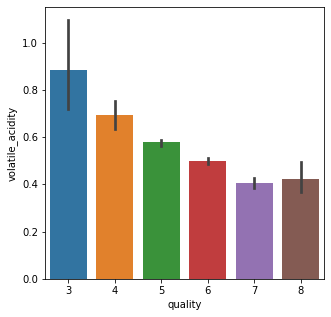

In [8]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile_acidity', data = df)

quality feature forms an normal distibution, cause in  the middle  the counts are higher.

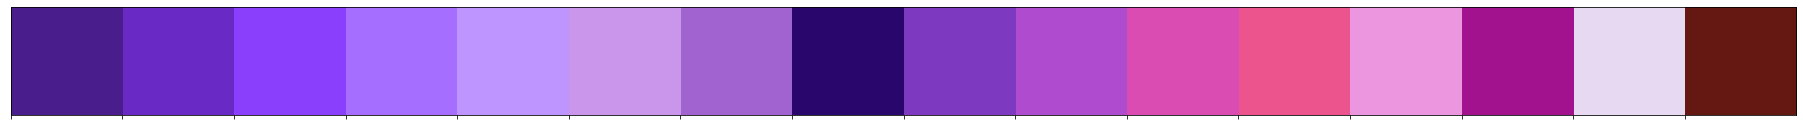

In [9]:
#some color names and their color
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

[Text(0.5, 1.0, "Distribution of 'residual_sugar'")]

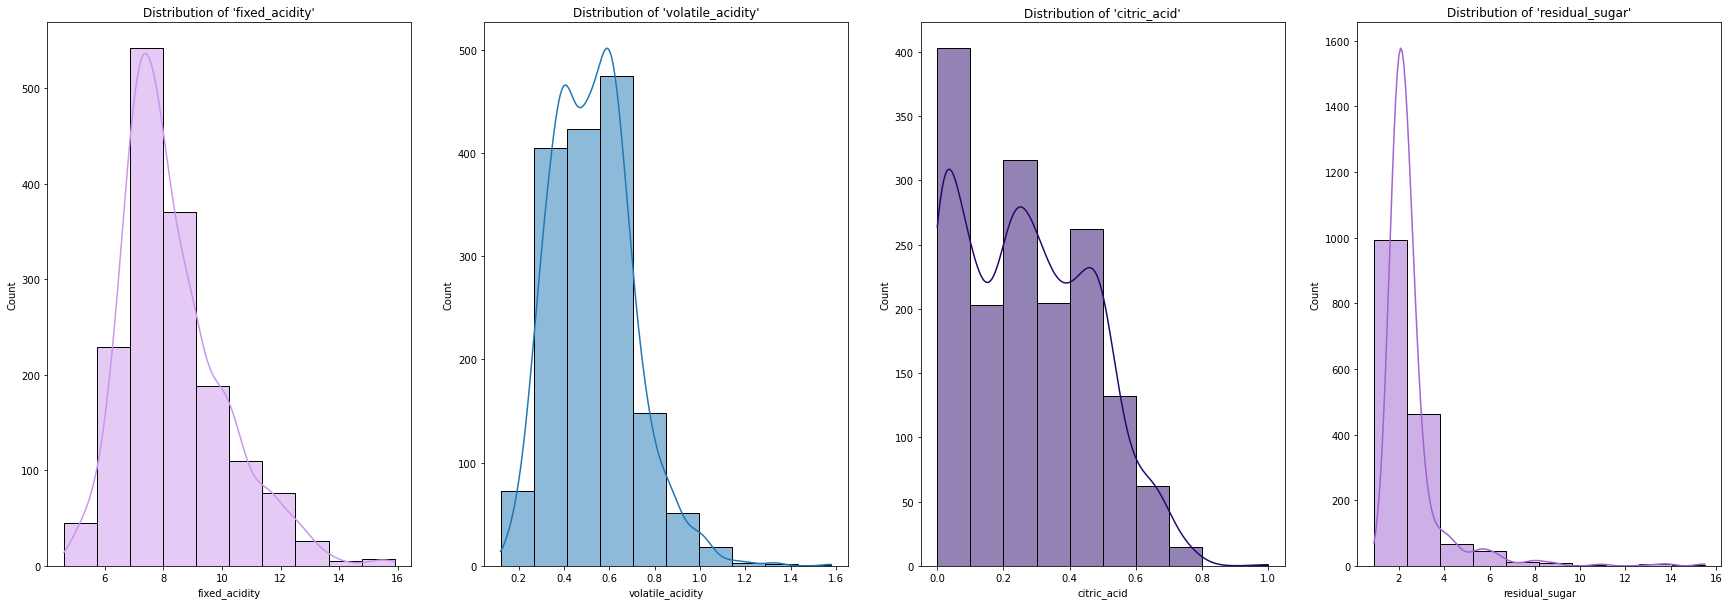

In [10]:
#hist plot is used to plot the distributions of data. used for uni and bivariate analysis

fig, axes = plt.subplots(1,4,figsize = (30, 10)) 

sns.histplot(ax = axes[0], x = df["fixed_acidity"],bins=10,cbar=True,kde=True,color = "#CA96EC").set(title = "Distribution of 'fixed_acidity'");

sns.histplot(ax = axes[1], x = df["volatile_acidity"],bins=10,kde=True).set(title = "Distribution of 'volatile_acidity'");

sns.histplot(ax = axes[2], x = df["citric_acid"],bins = 10,kde = True,cbar=True,color = "#29066B").set(title = "Distribution of 'citric_acid'");

sns.histplot(ax=axes[3], x=df['residual_sugar'], bins=10,cbar=True,kde=True,color='#A163CF').set(title="Distribution of 'residual_sugar'")

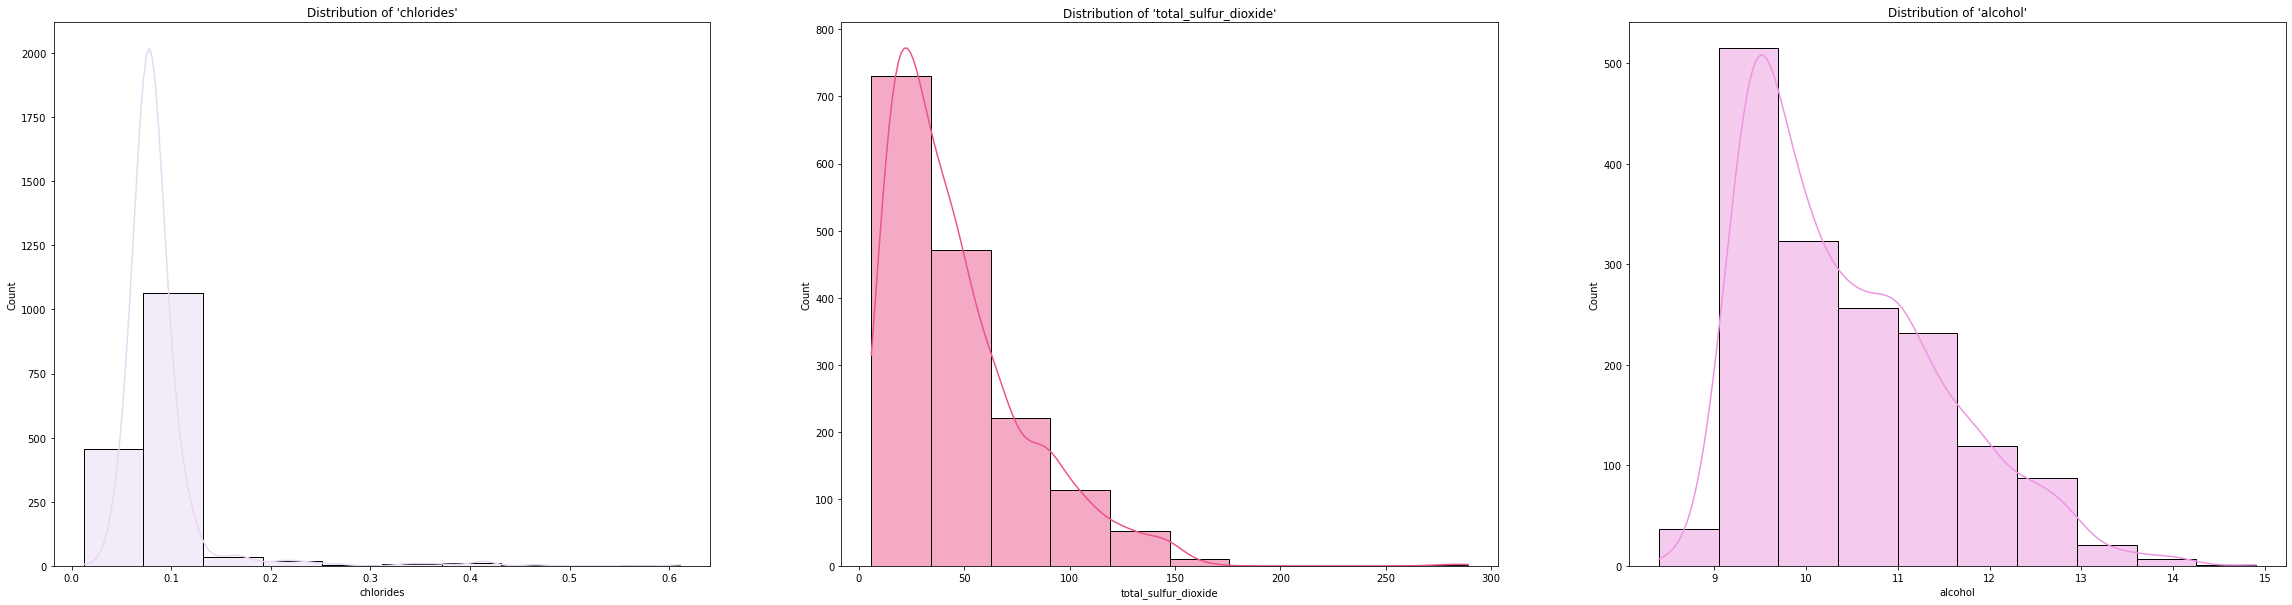

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = df["chlorides"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#E8D9F3").set(title = "Distribution of 'chlorides'");

sns.histplot(ax = axes[1], x = df["total_sulfur_dioxide"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#EB548C").set(title = "Distribution of 'total_sulfur_dioxide'");

sns.histplot(ax = axes[2], x = df["alcohol"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#EC96E0").set(title = "Distribution of 'alcohol'");


# PairPlot 
-Used to check the the multicolinearity between independent and dependent varaibles

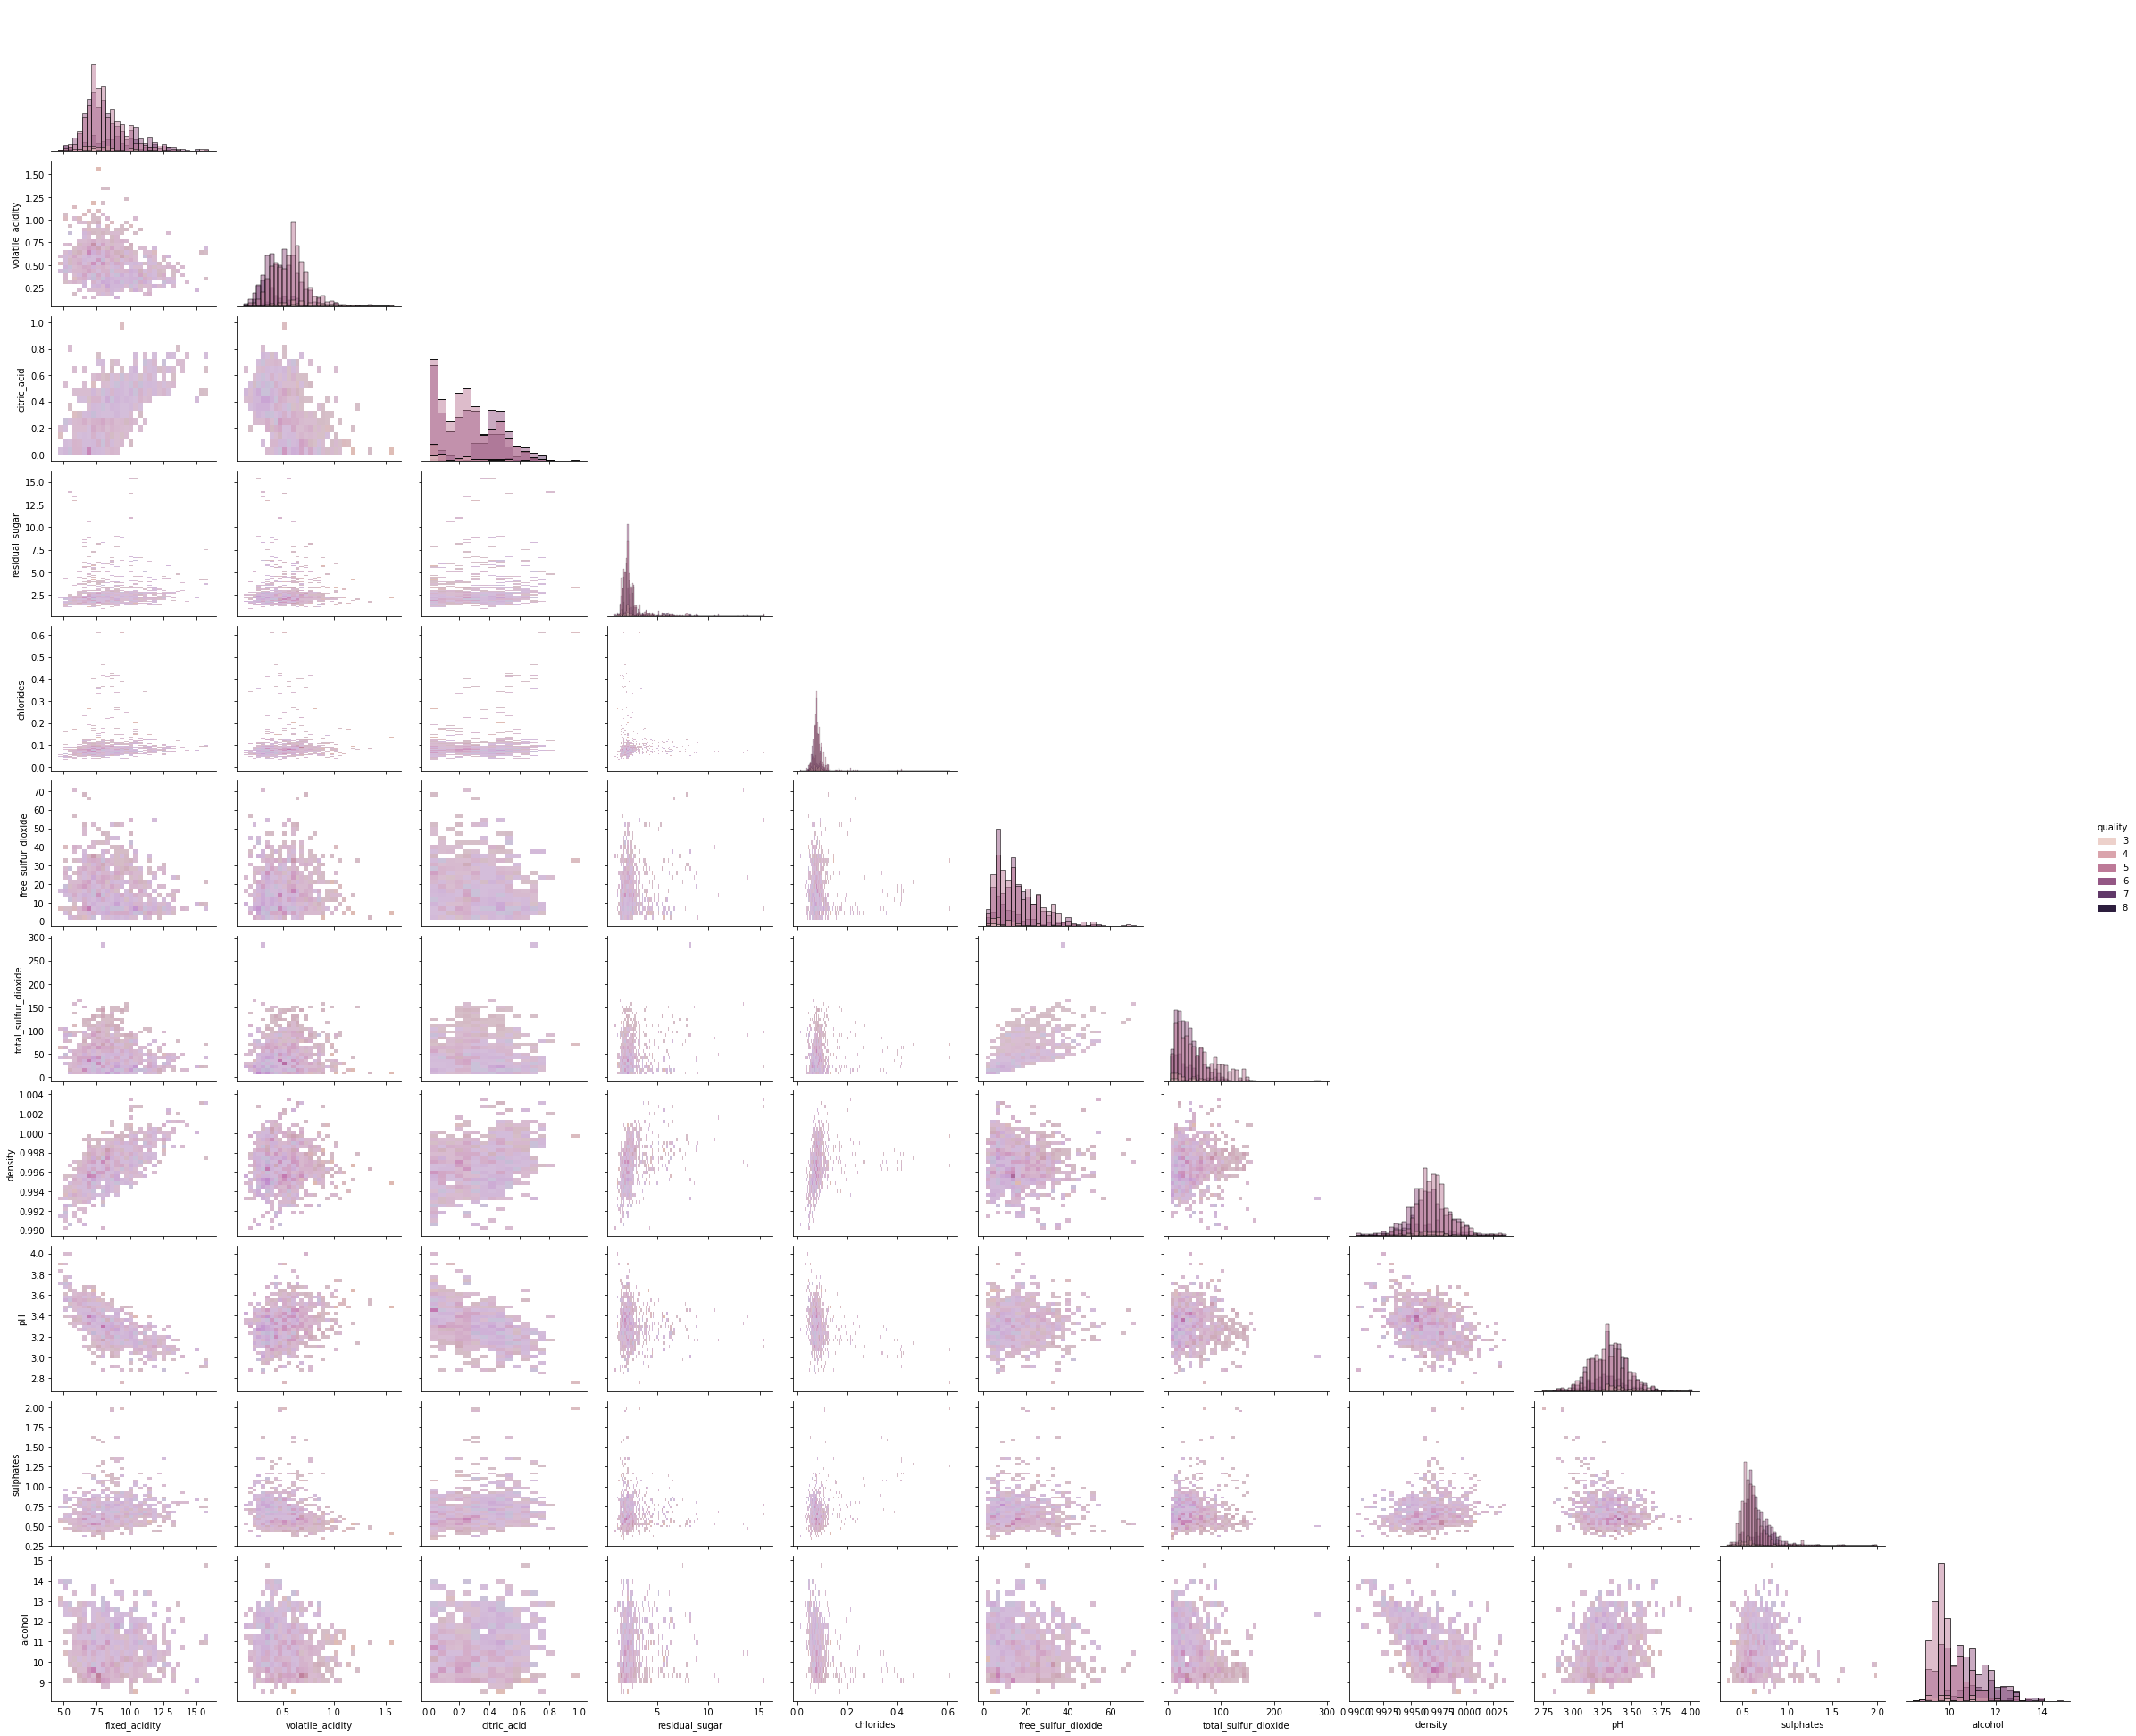

In [12]:
#corner true means plot not in rectangle 
sns.pairplot(df,kind='hist',hue='quality',aspect=1.2, corner=True)

In [13]:
#now iam using scatter plot again to check the collinearity

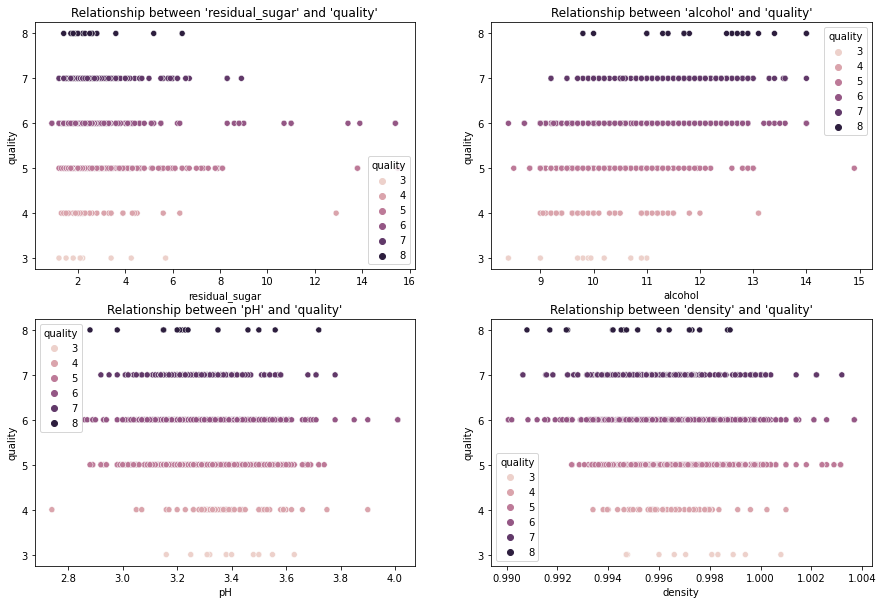

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'density' and 'quality'");

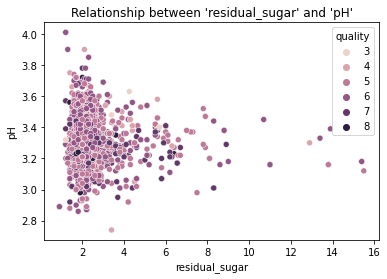

In [15]:
sns.scatterplot(x = "residual_sugar",
                y = "pH",
                hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'pH'");

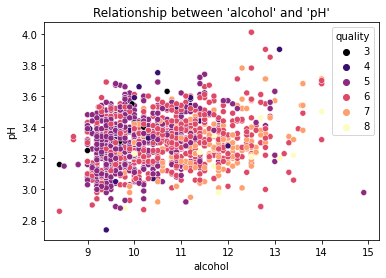

In [16]:
sns.scatterplot(x = "alcohol",
                y = "pH",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'alcohol' and 'pH'");

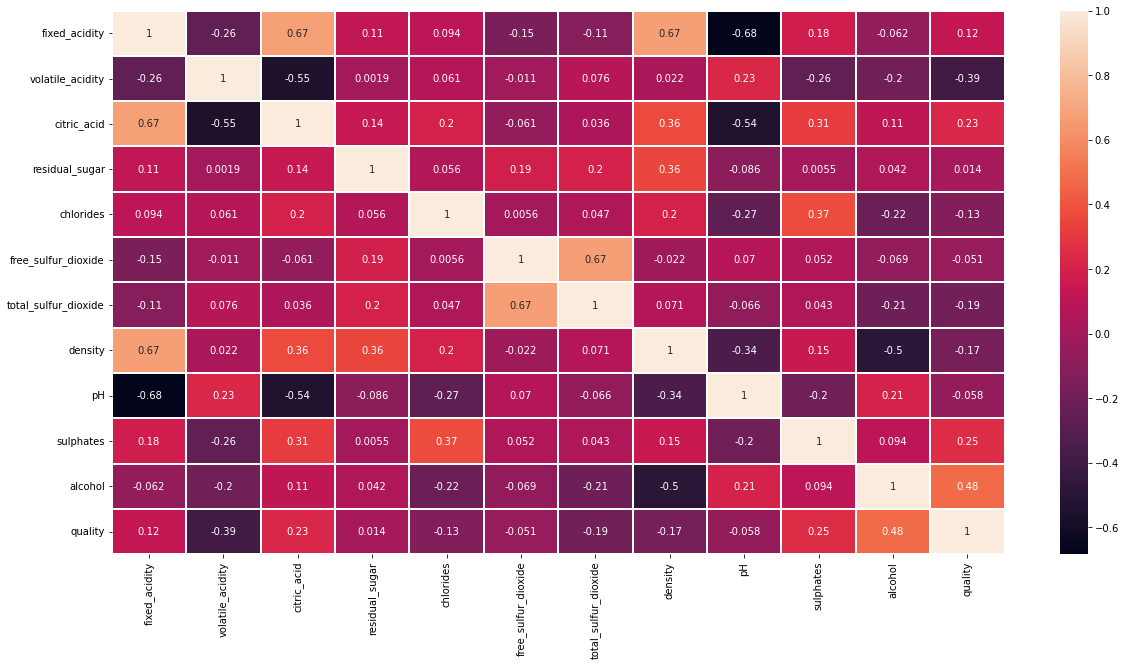

In [17]:
plt.figure(figsize = [20, 10])
sns.heatmap(df.corr(), annot = True, linewidths = 2);

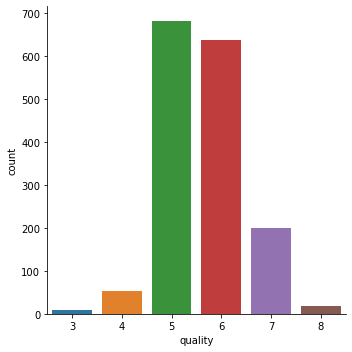

In [18]:
sns.catplot(x='quality',data=df, kind = 'count' )

In [20]:
df['quality'] = df['quality'].map({5:0,4:0,3:0,6:0,7:1,8:1})

In [21]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [22]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Splitting independent and dependent variables

In [23]:
X = df.drop("quality", axis = 1)
y=df.quality

In [25]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,stratify=y)

In [26]:
oversample = SMOTE()
X_train, y_train =oversample.fit_resample(X_train, y_train)

In [28]:
X_test,y_test= oversample.fit_resample(X_test,y_test)

# Model Building

In [29]:
from sklearn.metrics import precision_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
rfc = RandomForestClassifier()
boost = AdaBoostClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
gboost = GradientBoostingClassifier()
xgboost1 = XGBClassifier()

In [31]:
clfs = {
    'GNB':gnb,
    'NB': mnb, 
    'RF': rfc, 
    'AdaBoost': boost, 
    'GBDT':gboost,
    'xgb':xgboost1
}

In [32]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

# Model Evaluation 

In [33]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print(name , 'Evaluation report')
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

GNB Evaluation report
Accuracy -  0.7817919075144508
Precision -  0.768595041322314
NB Evaluation report
Accuracy -  0.6430635838150289
Precision -  0.6164705882352941
RF Evaluation report
Accuracy -  0.7947976878612717
Precision -  0.8984375
AdaBoost Evaluation report
Accuracy -  0.8323699421965318
Precision -  0.852760736196319
GBDT Evaluation report
Accuracy -  0.8265895953757225
Precision -  0.8741721854304636
xgb Evaluation report
Accuracy -  0.8179190751445087
Precision -  0.9135338345864662


In [34]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [35]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,xgb,Accuracy,0.817919
1,RF,Accuracy,0.794798
2,GBDT,Accuracy,0.826590
3,AdaBoost,Accuracy,0.832370
4,GNB,Accuracy,0.781792
5,NB,Accuracy,0.643064
6,xgb,Precision,0.913534
7,RF,Precision,0.898438
8,GBDT,Precision,0.874172
9,AdaBoost,Precision,0.852761


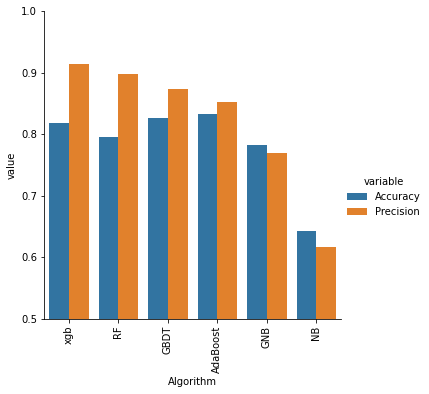

In [36]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Tuning the RandomForest Model

In [40]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
#random_cv = RandomizedSearchCV()@

In [42]:
n_estimators = [int(x) for x in np.linspace(start=80, stop=200, num=10)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(4,20,num=8)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [43]:
RF_tuning = {'n_estimators': n_estimators,
          'max_features':max_features,
            'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf
          }


print(RF_tuning)

{'n_estimators': [80, 93, 106, 120, 133, 146, 160, 173, 186, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 6, 8, 10, 13, 15, 17, 20], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
rf_random = RandomizedSearchCV(rfc, param_distributions=RF_tuning,
                             scoring='neg_mean_squared_error',cv=5,random_state=101,verbose=2,n_jobs=1)

In [45]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.6s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.4s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.4s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.4s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=173; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=173; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=173; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=173; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=173; total time=   0.5s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=93; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=93; total time=   0.2s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=93; total time=   0.2s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=93; total time=   0.2s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=93; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.6s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.8s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.8s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.8s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.6s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.6s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=146; total time=   0.5s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=146; total time=   0.4s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=146; total time=   0.4s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=146; total time=   0.4s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=146; total time=   0.4s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=146; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=146; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=146; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=146; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=146; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=120; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=120; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=120; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=120; total time=   0.3s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160; total time=   0.4s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=186; total time=   0.7s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=186; total time=   0.6s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=186; total time=   0.6s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=186; total time=   0.6s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=186; total time=   0.6s


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [4, 6, 8, 10, 13, 15, 17,
                                                      20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 93, 106, 120, 133,
                                                         146, 160, 173, 186,
                                                         200]},
                   random_state=101, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
rf_random.best_params_

{'n_estimators': 186,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 13}

In [47]:
forest = RandomForestClassifier(n_estimators=186, min_samples_split=5, min_samples_leaf=2,max_features='auto',max_depth=13)

In [48]:
forest.fit(X_train,y_train)

C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=13, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=186)

In [49]:
prediction = forest.predict(X_test)

In [50]:
accuracy_score(y_test, prediction)

0.8049132947976878

In [51]:
precision_score(y_test,prediction)

0.8981132075471698

In [52]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       346
           1       0.90      0.69      0.78       346

    accuracy                           0.80       692
   macro avg       0.82      0.80      0.80       692
weighted avg       0.82      0.80      0.80       692



# Tuning XGboost

In [53]:
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [80, 93, 106, 120, 133, 146, 160, 173, 186, 200,213,226],
              'num_class': [10]
              }

In [54]:
xgboost = XGBClassifier(objective="multi:softmax", tree_method='hist',)
clf = RandomizedSearchCV(estimator=xgboost,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

In [55]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                   n_iter=25, n_jobs=4,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4],
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [80, 93, 106, 120, 133,
                                                         146, 160, 173, 186,
                                                         200, 213, 226],
                                        'num_class': [10],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy', verbose=1)

In [56]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       346
           1       0.92      0.72      0.81       346

    accuracy                           0.83       692
   macro avg       0.84      0.83      0.82       692
weighted avg       0.84      0.83      0.82       692



In [57]:
accuracy_score(y_test,y_pred)

0.8265895953757225

# Tuning AdaBoost

In [58]:
classifier = AdaBoostClassifier(random_state=96,base_estimator=RandomForestClassifier(random_state=101),
                                n_estimators=100,learning_rate=0.01)

In [59]:
classifier.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=101),
                   learning_rate=0.01, n_estimators=100, random_state=96)

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
print(accuracy_score(y_test,y_pred))

0.7991329479768786


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82       346
           1       0.91      0.66      0.77       346

    accuracy                           0.80       692
   macro avg       0.82      0.80      0.80       692
weighted avg       0.82      0.80      0.80       692



--I got best accuracy by using XGBoost.

# Saving the Model

In [63]:
import pickle 

In [64]:
filename = 'xgboost_wine.pkl'
pickle.dump(clf,open(filename, 'wb'))

In [65]:
#how to load and using saved model
#rb-reading the binary formatted files
loaded_model = pickle.load(open('xgboost_wine.pkl','rb'))